In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
acs_df = pd.read_csv("../Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
commodities_df = pd.read_csv("../Data/all_commodities_fixed.csv")
stocks_prices_df = pd.read_csv("../Data/all_stock_and_etfs.csv")
meat_store_df = pd.read_csv("../Data/Meat_Stats_Cold_Storage.csv")
meat_prod_df = pd.read_csv("../Data/Meat_Stats_Meat_Production.csv")
meat_scounts_df = pd.read_csv("../Data/Meat_Stats_Slaughter_Counts.csv")
meat_sweights_df = pd.read_csv("../Data/Meat_Stats_Slaughter_Weights.csv")
health_df = pd.read_csv("../Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")
stocks_info_df = pd.read_csv("../Data/stock_descriptions.csv")

C:\Users\lisaf\AppData\Local\Temp\ipykernel_19972\1116362578.py:8: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  health_df = pd.read_csv("../Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


In [3]:
print(stocks_prices_df.columns)
stocks_prices_df['Ticker_Symbol'][:3]

Index(['Date-Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker_Symbol'], dtype='object')


0    HRL
1    HRL
2    HRL
Name: Ticker_Symbol, dtype: object

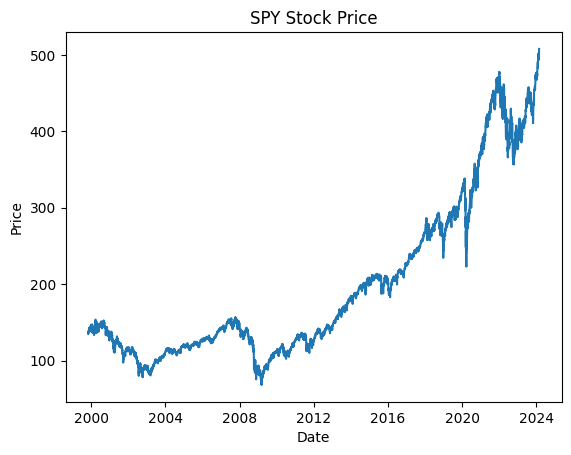

In [4]:
# Filter the dataframe for SPY ticker symbol
spy_df = stocks_prices_df[stocks_prices_df['Ticker_Symbol'] == 'SPY'].copy()

# Convert Date-Time column to datetime type using .loc
spy_df.loc[:, 'Date-Time'] = pd.to_datetime(spy_df['Date-Time'])

# Plot SPY's price against time
plt.plot(spy_df['Date-Time'], spy_df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Stock Price')
plt.show()

In [5]:
meat_store_df.columns
meat_store_df['Type_Of_Meat'].unique()

array(['Red Meat', 'Poultry'], dtype=object)

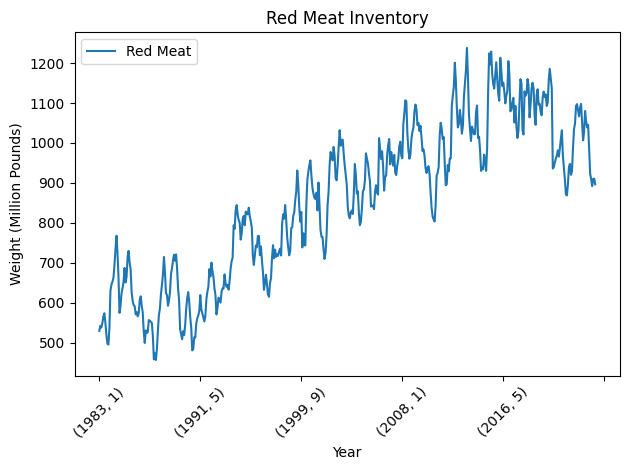

In [18]:
# Filter the dataframe for red meat and poultry, and for years 2015 and later
red_meat_store_df = meat_store_df[meat_store_df['Type_Of_Meat'] == 'Red Meat'].copy()
poultry_store_df = meat_store_df[meat_store_df['Type_Of_Meat'] == 'Poultry'].copy()

# Sort the dataframe by date
red_meat_store_df.sort_values(['Year', 'Month'], inplace=True)

# Plot red meat
red_meat_store_df.groupby(['Year', 'Month'])['Weight'].sum().plot(label='Red Meat')
plt.xlabel('Year')
plt.ylabel('Weight (Million Pounds)')
plt.title('Red Meat Inventory')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Red Meat Inventory.png")

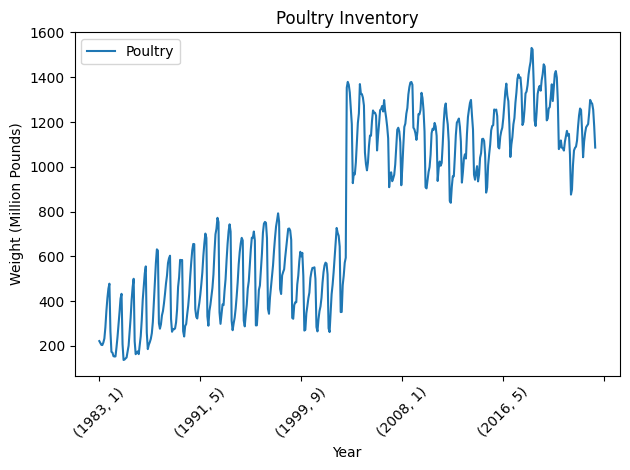

In [19]:
# Sort the dataframe by date
poultry_store_df.sort_values(['Year', 'Month'], inplace=True)

# Plot poultry
poultry_store_df.groupby(['Year', 'Month'])['Weight'].sum().plot(label='Poultry')
plt.xlabel('Year')
plt.ylabel('Weight (Million Pounds)')
plt.title('Poultry Inventory')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Poultry Inventory.png")

In [27]:
# June 2023 spike in Poultry: Due to inclusion of Broilers

# poultry_store_group_df = poultry_store_df.groupby(['Year', 'Month'])['Weight'].sum().reset_index()
# poultry_store_group_df[(poultry_store_group_df['Year'] < 2005) & (poultry_store_group_df['Year'] > 2000)]
# poultry_store_df[poultry_store_df['Year'] == 2003]

In [8]:
meat_prod_df.columns
meat_prod_df['Type of Meat'].unique()

array(['Red Meat', 'Poultry'], dtype=object)

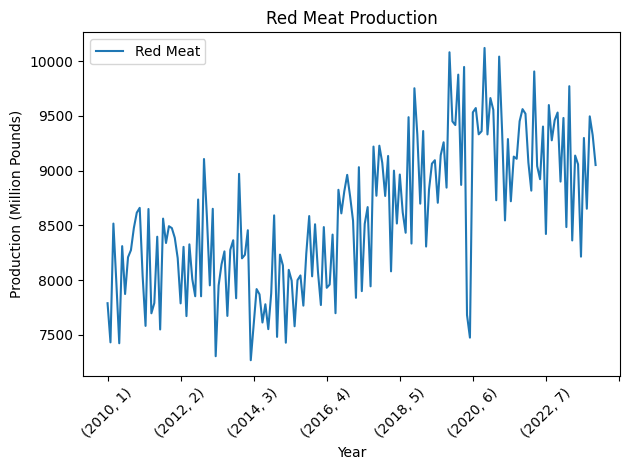

In [29]:
# Filter the dataframe for red meat and poultry, and for years 2010 and later
red_meat_prod_df = meat_prod_df[(meat_prod_df['Type of Meat'] == 'Red Meat') & (meat_prod_df['Year'] >= 2010)].copy()
poultry_prod_df = meat_prod_df[(meat_prod_df['Type of Meat'] == 'Poultry') & (meat_prod_df['Year'] >= 2010)].copy()

# Sort the dataframe by date
red_meat_prod_df.sort_values(['Year', 'Month'], inplace=True)

# Plot red meat
red_meat_prod_df['Production'] = red_meat_prod_df['Production'].str.replace(',', '').astype(float)
red_meat_prod_df.groupby(['Year', 'Month'])['Production'].sum().plot(label='Red Meat')
plt.xlabel('Year')
plt.ylabel('Production (Million Pounds)')
plt.title('Red Meat Production')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Red Meat Production.png")

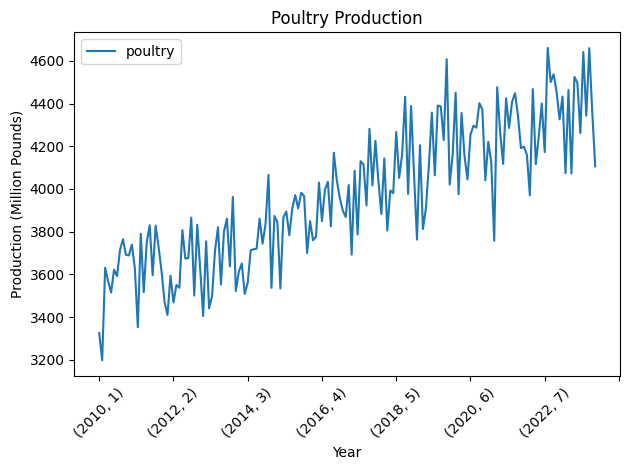

In [30]:
# Sort the dataframe by date
poultry_prod_df.sort_values(['Year', 'Month'], inplace=True)

# Plot poultry
poultry_prod_df['Production'] = poultry_prod_df['Production'].str.replace(',', '').astype(float)
poultry_prod_df.groupby(['Year', 'Month'])['Production'].sum().plot(label='poultry')
plt.xlabel('Year')
plt.ylabel('Production (Million Pounds)')
plt.title('Poultry Production')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Poultry Production.png")

In [11]:
meat_scounts_df.columns

Index(['Date', 'Year', 'Month', 'Unit', 'Animal', 'Count',
       'Commercial_Or_Federally_Inspected', 'Type_Of_Meat'],
      dtype='object')

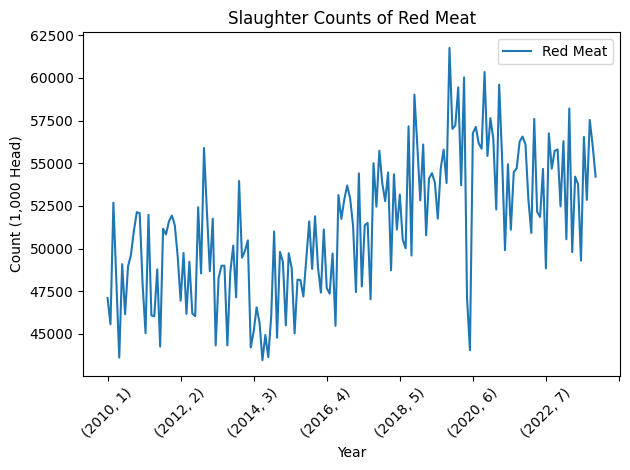

In [31]:
# Filter the dataframe for red meat and poultry, and for years 2010 and later
red_meat_scounts_df = meat_scounts_df[(meat_scounts_df['Type_Of_Meat'] == 'Red Meat') & (meat_scounts_df['Year'] >= 2010)].copy()
poultry_scounts_df = meat_scounts_df[(meat_scounts_df['Type_Of_Meat'] == 'Poultry') & (meat_scounts_df['Year'] >= 2010)].copy()

# Sort the dataframe by date
red_meat_scounts_df.sort_values(['Year', 'Month'], inplace=True)

# Plot red meat
red_meat_scounts_df['Count'] = red_meat_scounts_df['Count'].str.replace(',', '').astype(float)
red_meat_scounts_df.groupby(['Year', 'Month'])['Count'].sum().plot(label='Red Meat')
plt.xlabel('Year')
plt.ylabel('Count (1,000 Head)')
plt.title('Slaughter Counts of Red Meat')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Red Meat Slaughter Counts.png")

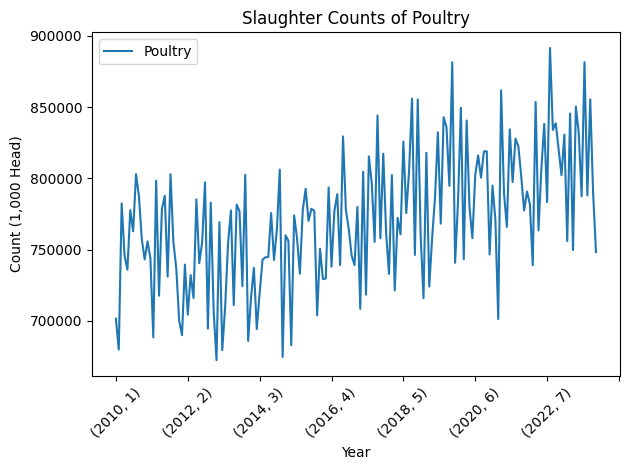

In [32]:
# Sort the dataframe by date
poultry_scounts_df.sort_values(['Year', 'Month'], inplace=True)

# Plot poultry
poultry_scounts_df['Count'] = poultry_scounts_df['Count'].str.replace(',', '').astype(float)
poultry_scounts_df.groupby(['Year', 'Month'])['Count'].sum().plot(label='Poultry')
plt.xlabel('Year')
plt.ylabel('Count (1,000 Head)')
plt.title('Slaughter Counts of Poultry')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Poultry Slaughter Counts.png")

In [14]:
meat_sweights_df.columns

Index(['Date', 'Year', 'Month', 'Unit', 'Animal', 'Weight',
       'Commercial_Or_Federally_Inspected', 'Live_Or_Dressed', 'Type_Of_Meat'],
      dtype='object')

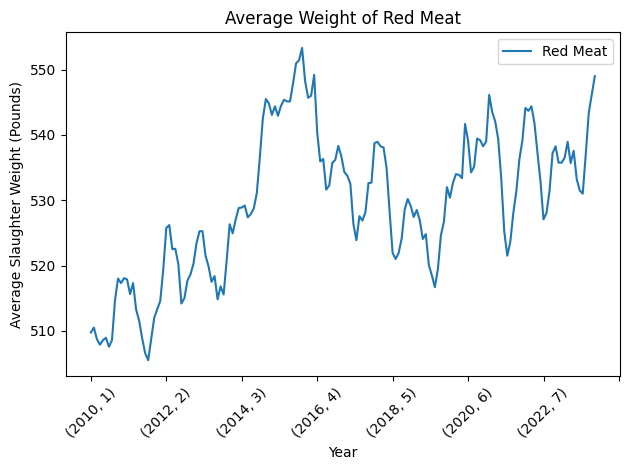

In [33]:
# Filter the dataframe for red meat and poultry, and for years 2010 and later
red_meat_sweights_df = meat_sweights_df[(meat_sweights_df['Type_Of_Meat'] == 'Red Meat') & (meat_sweights_df['Year'] >= 2010)].copy()
poultry_sweights_df = meat_sweights_df[(meat_sweights_df['Type_Of_Meat'] == 'Poultry') & (meat_sweights_df['Year'] >= 2010)].copy()

# Sort the dataframe by date
red_meat_sweights_df.sort_values(['Year', 'Month'], inplace=True)

# Plot red meat
red_meat_sweights_df['Weight'] = red_meat_sweights_df['Weight'].astype(str).str.replace(',', '').astype(float)
red_meat_sweights_df.groupby(['Year', 'Month'])['Weight'].mean().plot(label='Red Meat')
plt.xlabel('Year')
plt.ylabel('Average Slaughter Weight (Pounds)')
plt.title('Average Weight of Red Meat')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Red Meat Average Weight.png")

In [35]:
red_meat_sweights_df.groupby(['Year', 'Month'])['Weight'].mean()

Year  Month
2010  1        509.7500
      2        510.5000
      3        508.7500
      4        507.8750
      5        508.5625
                 ...   
2023  8        531.0000
      9        537.0000
      10       543.3750
      11       546.1875
      12       549.0000
Name: Weight, Length: 168, dtype: float64

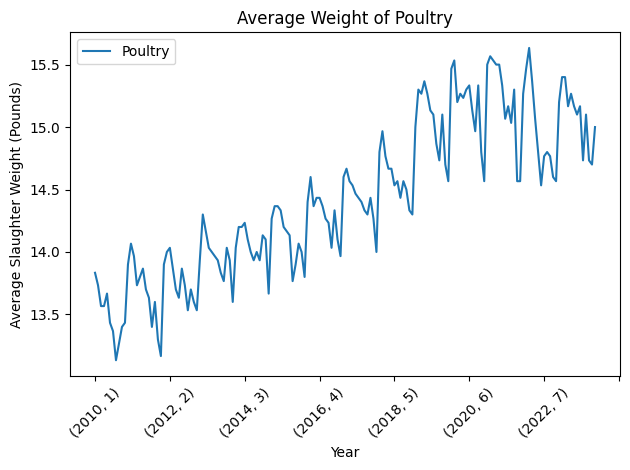

In [34]:
# Sort the dataframe by date
poultry_sweights_df.sort_values(['Year', 'Month'], inplace=True)

# Plot poultry
poultry_sweights_df['Weight'] = poultry_sweights_df['Weight'].astype(str).str.replace(',', '').astype(float)
poultry_sweights_df.groupby(['Year', 'Month'])['Weight'].mean().plot(label='Poultry')
plt.xlabel('Year')
plt.ylabel('Average Slaughter Weight (Pounds)')
plt.title('Average Weight of Poultry')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
# plt.savefig("./Figures/Poultry Average Weight.png")

In [17]:
print(meat_sweights_df['Type_Of_Meat'].unique())
poultry_sweights_df = meat_sweights_df[(meat_sweights_df['Type_Of_Meat'] == 'Poultry') & (meat_sweights_df['Year'] >= 2010)].copy()
poultry_sweights_df.size
print(meat_sweights_df.shape)
print(meat_sweights_df.iloc[2677])

['Red Meat' 'Poultry']
(9348, 9)
Date                                                 Nov-2005
Year                                                     2005
Month                                                      11
Unit                                 Average Weight in Pounds
Animal                                                 Calves
Weight                                                    364
Commercial_Or_Federally_Inspected         Federally Inspected
Live_Or_Dressed                                          Live
Type_Of_Meat                                         Red Meat
Name: 2677, dtype: object
